In [4]:
with open("sales.csv", "r", encoding="utf-8-sig") as f:
    data = f.read()

with open("clean.csv", "w", encoding="utf-8") as f:
    f.write(data)


## Problem

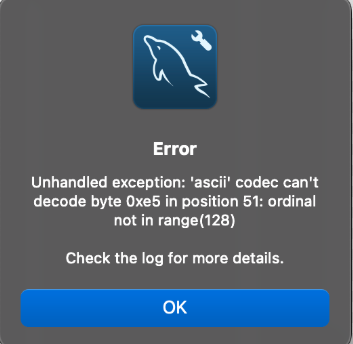

---

```python
with open("sales.csv", "r", encoding="utf-8-sig") as f:
    data = f.read()

with open("clean.csv", "w", encoding="utf-8") as f:
    f.write(data)
```

### ধাপে ধাপে ব্যাখ্যা:

#### ১. প্রথম লাইন:

```python
with open("sales.csv", "r", encoding="utf-8-sig") as f:
    data = f.read()
```

* `open("sales.csv", "r", ...)`
  মানে হচ্ছে তুমি `sales.csv` নামের ফাইলটা **খুলছো**, আর `"r"` মানে হচ্ছে **read মোডে** (মানে শুধু পড়বে, লিখবে না)।

* `encoding="utf-8-sig"`
  এখানে Python কে বলছো: “এই ফাইলের ভেতরে কিছু special শুরুর অক্ষর (BOM) থাকতে পারে। তুমি সেটা ইগনোর করে ফাইল পড়ো।”

  * BOM (Byte Order Mark) হলো অদৃশ্য ক্যারেক্টার যেটা ফাইলের শুরুতে থাকে। সাধারণত Excel/Windows থেকে save করলে আসে।
  * BOM থাকলে MySQL বা অন্য টুল গুলা confuse হয়।

* `f.read()`
  ফাইলের ভেতরের **সব লেখা (data)** একটা variable-এ নিয়ে আসবে, যার নাম হলো `data`।

---

#### ২. দ্বিতীয় লাইন:

```python
with open("clean.csv", "w", encoding="utf-8") as f:
    f.write(data)
```

* `open("clean.csv", "w", ...)`
  মানে নতুন একটা ফাইল বানাচ্ছো, নাম **clean.csv**।
  `"w"` মানে **write মোডে** (মানে নতুন করে লিখবে, পুরান কিছু থাকলে মুছে ফেলবে)।

* `encoding="utf-8"`
  এবার ফাইলটা সেভ করছো **UTF-8** এ, কিন্তু এবার **BOM ছাড়া**।

* `f.write(data)`
  আগের ফাইল থেকে পড়া সব ডেটা (`data`) এখন `clean.csv` তে লিখে দিচ্ছো।

---

### শেষ ফলাফল:

* `sales.csv` → ছিল **BOM সহ** (problematic)
* `clean.csv` → হলো **clean UTF-8 without BOM**
  এখন এই `clean.csv` MySQL-এ Import করলে আর **ASCII error আসবে না**।

---

এক লাইনে বললে:
এই কোডটা মূল ফাইল থেকে ডেটা কপি করে, শুরুর ঝামেলাপূর্ণ অক্ষর (BOM) বাদ দিয়ে নতুন ফাইল বানায় যেটা MySQL ঠিকমতো পড়তে পারবে।



## Steps

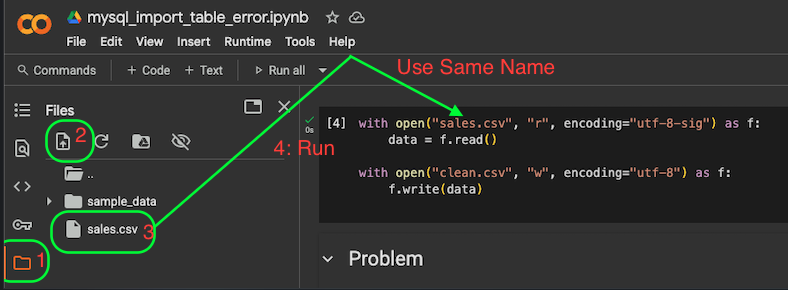